In [39]:
!pip install opencv-python-headless scikit-learn matplotlib

In [40]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from google.colab.patches import cv2_imshow
import cv2
import numpy as np


def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();

      const dataUrl = canvas.toDataURL('image/jpeg', quality);
      return dataUrl;
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    import IPython
    import io, base64
    image_bytes = io.BytesIO(base64.b64decode(data.split(',')[1]))
    with open(filename, 'wb') as f:
        f.write(image_bytes.read())
    return filename

filename = take_photo()

<IPython.core.display.Javascript object>

In [41]:

image = cv2.imread(filename)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

image = cv2.resize(image, (128, 128))

pixel_data = image.reshape((-1, 3))

In [42]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, random_state=42)
labels_kmeans = kmeans.fit_predict(pixel_data)
seg_kmeans = labels_kmeans.reshape(image.shape[:2])

In [43]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=2)
labels_agglo = agglo.fit_predict(pixel_data)
seg_agglo = labels_agglo.reshape(image.shape[:2])

In [44]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

pixel_scaled = StandardScaler().fit_transform(pixel_data)
dbscan = DBSCAN(eps=0.6, min_samples=50)
labels_dbscan = dbscan.fit_predict(pixel_scaled)
seg_dbscan = labels_dbscan.reshape(image.shape[:2])

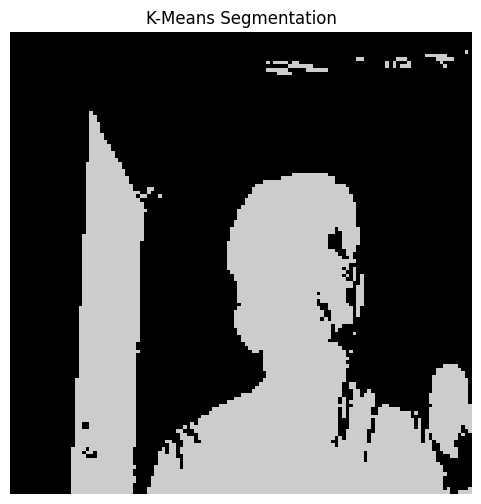

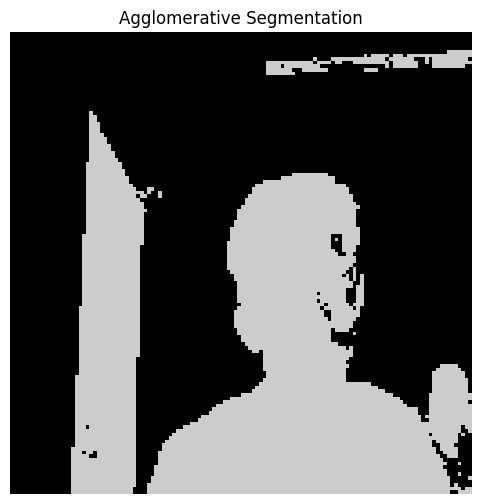

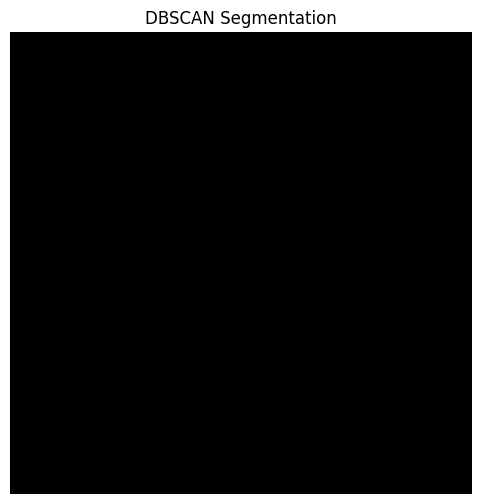

In [45]:
import matplotlib.pyplot as plt

def show_segmented(segmented, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(segmented, cmap='nipy_spectral')
    plt.title(title)
    plt.axis('off')
    plt.show()

show_segmented(seg_kmeans, "K-Means Segmentation")
show_segmented(seg_agglo, "Agglomerative Segmentation")
show_segmented(seg_dbscan, "DBSCAN Segmentation")